#**6장. 순환 신경망**

#Embedding

Embedding 실습 예제) 단어 임베딩 실습

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
import gensim.downloader as api

texts = ["You are the Best",
         "You are the Nice"]

tokenizer = Tokenizer(num_words = 10, oov_token = "<OOV>")
tokenizer.fit_on_texts(texts)
print(tokenizer.word_index)

sequences = tokenizer.texts_to_sequences(texts)

binary_results = tokenizer.sequences_to_matrix(sequences, mode = "binary")

print("--------------------------------------")

print(f"sequences : {sequences}\n")
print(f"binary_vectors :\n {binary_results}\n")

test_text = ['You are the One']
test_seq = tokenizer.texts_to_sequences(test_text)
print(f'test sequences: {test_seq}')

for model_name, model_data in sorted(api.info()['models'].items()):
  print(
    '%s (%d records): %s' % (
    model_name,
    model_data.get('num_records', -1),
    model_data['description'][:40] + '...',
    )
  )
model = api.load("word2vec-google-news-300")

print(model.most_similar("cat"))
print(model.most_similar_cosmul(positive=['Seoul', 'France'], negative=['Paris']))
print(model.most_similar_cosmul(positive=['father','woman'], negative=['man']))
print(model.most_similar_cosmul(positive=['brother','woman'], negative=['man']))
print(model.most_similar_cosmul(positive=['soju','mexico'], negative=['korea']))
print(model.most_similar_cosmul(positive=['soju','russia'], negative=['korea']))

{'<OOV>': 1, 'you': 2, 'are': 3, 'the': 4, 'best': 5, 'nice': 6}
--------------------------------------
sequences : [[2, 3, 4, 5], [2, 3, 4, 6]]

binary_vectors :
 [[0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 1. 0. 0. 0.]]

test sequences: [[2, 3, 4, 1]]
__testing_word2vec-matrix-synopsis (-1 records): [THIS IS ONLY FOR TESTING] Word vecrors ...
conceptnet-numberbatch-17-06-300 (1917247 records): ConceptNet Numberbatch consists of state...
fasttext-wiki-news-subwords-300 (999999 records): 1 million word vectors trained on Wikipe...
glove-twitter-100 (1193514 records): Pre-trained vectors based on  2B tweets,...
glove-twitter-200 (1193514 records): Pre-trained vectors based on 2B tweets, ...
glove-twitter-25 (1193514 records): Pre-trained vectors based on 2B tweets, ...
glove-twitter-50 (1193514 records): Pre-trained vectors based on 2B tweets, ...
glove-wiki-gigaword-100 (400000 records): Pre-trained vectors based on Wikipedia 2...
glove-wiki-gigaword-200 (400000 records): Pre-

Embedding - IMDB 예제) 임베딩 모델 구현해보기

(25000,) (25000,)
(25000,) (25000,)
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
--------
1
1번째로 가장 많이 쓰인

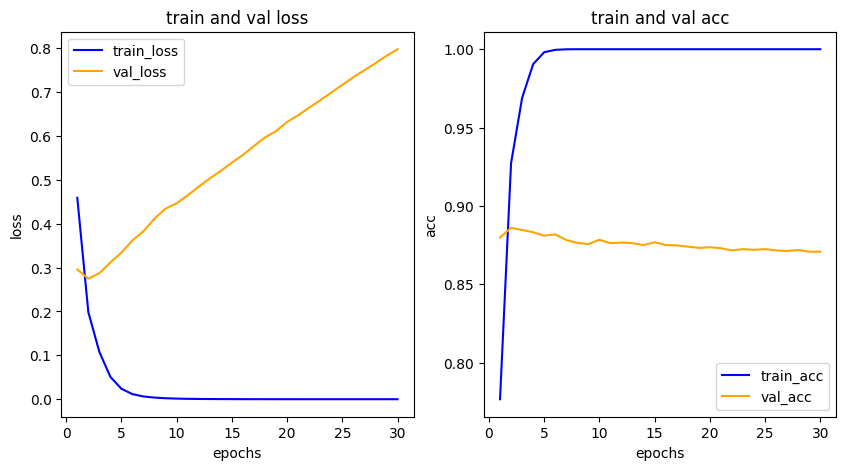

In [ ]:
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, Flatten
import matplotlib.pyplot as plt

num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = num_words)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

print(x_train[0])
print("--------")
print(y_train[0])

imdb_get_word_index = {}

for key, value in imdb.get_word_index().items():
  imdb_get_word_index[value] = key
for i in range(1, 50):
  print("{}번째로 가장 많이 쓰인 단어 = {}".format(i, imdb_get_word_index[i]))

max_len = 500
print("Befor pad_sequences: ", len(x_train[0]))

pad_x_train = pad_sequences(x_train, maxlen = max_len, padding = "pre")
pad_x_test = pad_sequences(x_test, maxlen = max_len, padding = "pre")

print("After pad_sequences: ", len(pad_x_train[0]))
print("pad_x_train: ", pad_x_train[0])

# # 모델 구성
model = Sequential()
# 이 층은 모델의 제일 첫 번째 층으로만 사용할 수 있습니다.
# Flatten 층을 사용하기 위해 input_length를 전달합니다.
model.add(Embedding(input_dim = num_words, output_dim = 32, input_length = max_len))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['acc'])
model.summary()
history = model.fit(pad_x_train, y_train,
                    batch_size = 32,
                    epochs = 30,
                    validation_split = 0.2)

# # 모델 평가
model.evaluate(pad_x_test, y_test)

# # 손실, 정확도 그리기
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']
epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))
# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()
acc = his_dict['acc']
val_acc = his_dict['val_acc']
# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()
plt.show()

# RNN

시퀀스 데이터 처리 모델 - RNN 예제) IMDB 데이터셋으로 RNN 학습

In [ ]:
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Embedding
import matplotlib.pyplot as pl

# # # # # # # # # 데이터셋 불러오기 및 전처리 # # # # # # # # #
# 1 ~ 10,000 빈도 순위에 해당하는 단어만 사용
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = num_words)

# 각 데이터 최대 길이를 500으로 맞추기
max_len = 500

pad_x_train = pad_sequences(x_train, maxlen = max_len)
pad_x_test = pad_sequences(x_test, maxlen = max_len)


# # # # # # # # # 모델 구성 및 학습 # # # # # # # # #
model = Sequential()

model.add(Embedding(input_dim = num_words, output_dim = 32))

# # 복잡한 시퀀스 패턴을 학습하기 위해 SimpleRNN 층을 2개로 구성
# # 새로운 인자 3개 사용
# # return_sequences, dropout, recurrent_dropout
# 첫 SimpleRNN 층은 입력 시퀀스에서 패턴 추출 역할, return_sequences = True 인자를
# 사용함으로써, 출력하는 각 시퀀스의 연속적인 출력값을 다음 층으로 전달
model.add(SimpleRNN(32, return_sequences = True, dropout = 0.15,
                    recurrent_dropout = 0.15))
# 두 번째 SimpleRNN 층은 첫 번째 층에서 전달받은 시퀀스 데이터를 기반으로 더 깊은
# 시퀀스 패턴 학습. return_sequences 인자를 False로 사용함으로써 최종 출력으로 단
# 하나의 벡터만을 생성하여 시퀀스 전체 정보 요약, 긍정/부정 리뷰 분류이므로
# 활성화 함수는 시그모이드 사용
model.add(SimpleRNN(32))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy",
              metrics = ["acc"])

# model.summary()
history = model.fit(pad_x_train, y_train, batch_size = 32, epochs = 15,
                    validation_split = 0.2)

# # # # # # # # # 그래프 그리기 # # # # # # # # #
# 손실값(Loss) 그래프
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도(Accuracy) 그래프
plt.figure(figsize=(8, 4))
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/15
625/625 [==============================] - 596s 942ms/step - loss: 0.6997 - acc: 0.5145 - val_loss: 0.6873 - val_acc: 0.5330
Epoch 2/15
625/625 [==============================] - 506s 809ms/step - loss: 0.6807 - acc: 0.5484 - val_loss: 0.6991 - val_acc: 0.5274
Epoch 3/15
625/625 [==============================] - 490s 784ms/step - loss: 0.6442 - acc: 0.6198 - val_loss: 0.5588 - val_acc: 0.7164
Epoch 4/15
625/625 [==============================] - 485s 776ms/step - loss: 0.6088 - acc: 0.6693 - val_loss: 0.6502 - val_acc: 0.5840
Epoch 5/15
625/625 [==============================] - 663s 1s/step - loss: 0.5648 - acc: 0.7057 - val_loss: 0.5129 - val_acc: 0.7528
Epoch 6/15
625/625 [==============================] - 502s 804ms/step - loss: 0.5360 - acc: 0.7400 - val_loss: 0.4849 - val_acc: 0.7846
Epoch 7/15
518/625 [=======================>......] - ETA: 1:21 - loss: 0.4799 - acc: 0.7779

KeyboardInterrupt: 

#LSTM

시퀀스 데이터 처리 모델 - LSTM 예제1) IMDB 데이터셋으로 LSTM 학습시키기
*   LSTM은 기본 RNN의 단점인 장기 의존성 문제 해결하기 위해 고안된 방법



(25000,) (25000,)
(25000,) (25000,)
350
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm (LSTM)                 (None, None, 64)          24832     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 357281 (1.36 MB)
Trainable params: 357281 (1.36 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/15
625/625 [==============================] - 53s 80ms/step - loss: 0.5044 - acc: 0.7559 - val_loss: 0

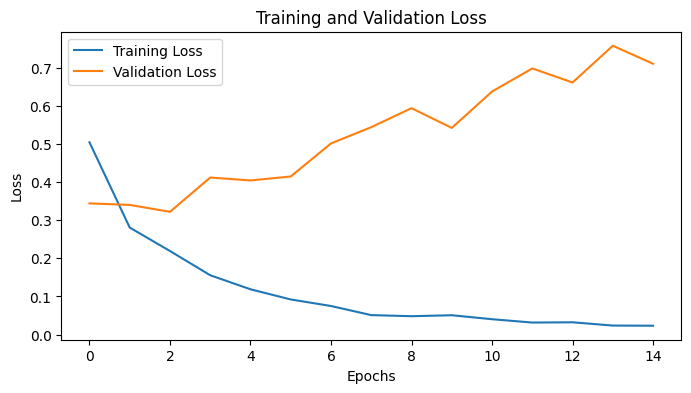

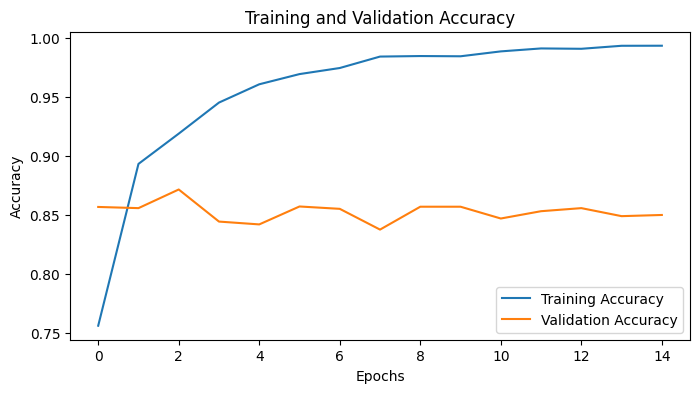

In [ ]:
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding
import matplotlib.pyplot as plt
# # # # # # # # # 데이터셋 불러오기 및 전처리 # # # # # # # # #
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = num_words)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

max_len = 350
pad_x_train = pad_sequences(x_train, maxlen = max_len)
pad_x_test = pad_sequences(x_test, maxlen = max_len)
print(len(pad_x_train[0]))

# # # # # # # # # 모델 구성 및 학습 # # # # # # # # #
model = Sequential()
model.add(Embedding(input_dim = num_words, output_dim = 32))
model.add(LSTM(64, return_sequences = True))
model.add(LSTM(32))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "adam", loss = "binary_crossentropy",
              metrics = ["acc"])
model.summary()
history = model.fit(pad_x_train, y_train, batch_size = 32,
                    epochs = 15, validation_split = 0.2)

# # # # # # # # # 그래프 그리기 # # # # # # # # #
# 손실값(Loss) 그래프
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도(Accuracy) 그래프
plt.figure(figsize=(8, 4))
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

시퀀스 데이터 처리 모델 - LSTM 실습 1) 네이버쇼핑 댓글 악플 체크 LSTM 모델 성해보기

In [ ]:
import urllib.request
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import numpy as np

# # # # # # # # # 네이버 리뷰 데이터 파일 불러오기 및 전처리 # # # # # # # # #
# # # # # # # # # 리뷰 텍스트(한글) 및 평점을 처리하기 위한 과정 # # # # # # # # #
# # 데이터 파일 불러오기
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt",
                           "shopping.txt")

# # pandas로 데이터파일 읽기 및 컬럼에 제목 달기
raw = pd.read_table("shopping.txt", names = ["rating", "review"])
print(raw)
print("=================================")

# # 평점 3점 이상이면 1, 그렇지 않으면 0(악플)을 부여하는 label열 추가
raw["label"] = np.where(raw["rating"] > 3, 1, 0) # rating이 3보다 크면 1, 그렇지 않으면 0(악플)
print(raw)
print("=================================")

# # 한글 전처리 1) 특수문자 제거 - 한글, 숫자, 스페이스 외는 제거
raw["review"] = raw["review"].str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣0-9]", "", regex = True)

# # 한글 전처리 2) 중복값 제거(데이터셋에는 중복 거의 없어서 티 안남)
raw.drop_duplicates(subset = "review", inplace = True)
print(raw)
print("=================================")

# # bag of words
uniqueWord = raw["review"].tolist()
uniqueWord = "".join(uniqueWord)
print(uniqueWord[0:100])
print("=================================")
# set으로 중복값 제거 후, list로 만들기
uniqueWord = list(set(uniqueWord))
uniqueWord.sort()
print(uniqueWord[0:100])
print("=================================")

# # 문자 단위로 정수로 변환(사전 형태로 정의) - 토큰화 시킨 후, 각 문자에 정수 인덱스 부여
# 각 문자 단위로 토큰화 수행하여 독립적인 토큰으로 처리
tokenizer = Tokenizer(char_level = True, oov_token = "<OOV>") # 신조어는 <OOV>로 표시
wordlist = raw["review"].tolist() # review 열 선택 후, 텍스트 리스트로 저장
tokenizer.fit_on_texts(wordlist)  # 방금 생성한 텍스트 리스트로부터 토큰의 인덱스 부여
print(tokenizer.word_index)
print("=================================")

# # 데이터셋을 정수로 변환
train_seq = tokenizer.texts_to_sequences(wordlist)
print(train_seq[0:100]) # 일부만 출력
print("=================================")

# # 평점 정답(label , 1/0)도 리스트로 변경
Y = raw["label"].tolist()
print(Y[0:10])
print("=================================")

# # 새로운 열에 리뷰 텍스트 길이 정보 추가
raw["length"] = raw["review"].str.len()

# # padding 처리 - 텍스트 글자 수 맞추기
# 제일 긴 문장 글자 수 확인하기
print(raw.head())
print(raw.describe())
print("=================================")
# 길이 지정
X = pad_sequences(train_seq, maxlen = 100)  #길이가 100보다 길면 뒷부분은 cut

# # train, test 셋 지정해서 나누기
trainX, valX, trainY, valY = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print(len(trainX))
print(len(valX))
print("=================================")

# # trainY와 valY를 numpy 배열로 변환
trainY = np.array(trainY)
valY = np.array(valY)

# # # # # # # # # LSTM 모델 구성 및 훈련 # # # # # # # # #
model = Sequential()

# # Embedding() 층으로 단어를 고정된 크기의 벡터로 변환
# 여기서 단어 사전 크기에 +1한 이유는 0 인덱스를 패딩을 위해 남겨두기 위해서임.
model.add(Embedding(len(tokenizer.word_index)+1, 16))

# # 64개 유닛을 가진 LSTM 레이어 추가, return_sequences = True로 LSTM 층이
# 모든 타임 스텝에 대한 출력을 반환하도록 설정, 결국 이를 받는 다음 LSTM 층 필요!
model.add(LSTM(64, return_sequences = True))

# # 32개의 유닛을 가진 또 다른 LSTM 층 추가, return_sequences를 설정하지 않았으므로
# 이 레이어가 시퀀스(순차적 무언가)의 마지막 타임 스텝에 대한 출력만 반환
model.add(LSTM(32))

# # RNN, LSTM은 긍정 / 부정을 판별하므로 출력층은 1개, 활성화 함수는 sigmoid() 혹은
# Tanh() 쪽으로 설정
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer="adam",
              loss = "binary_crossentropy",
              metrics = ["acc"])
model.summary()
history = model.fit(trainX,trainY,
                    batch_size = 32, epochs = 2,
                    validation_data=(valX, valY))
print("=================================")

# # 모델 저장
model.save("naver_review.h5") # 모델 저장
# 모델 로드하기
new_model = load_model("naver_review.h5")
print("=================================")

# # # # # # # # # 결과 확인하기 # # # # # # # # #
# # 새로운 리뷰 데이터에 대해 감정 분석(긍정 / 부정)을 수행하는 함수
def sentiment_predict(new_reviews):
  # 입력된 새로운 리뷰 데이터 new_reviews를 토큰화하여 정수 시퀀스로 변환
  new_sequences = tokenizer.texts_to_sequences(new_reviews)
  # 변환된 정수 시퀀스의 길이 일정하게 맞추기
  new_padded = pad_sequences(new_sequences, maxlen=100)
  # 앞서 저장하고 로드한 모델을 사용해 패딩된 시퀀스에 대한 예측 수행,
  # 여기서 predict 메서드는 각 리뷰에 대해 긍정일 확률을 나타내는 값을 반환
  predictions = new_model.predict(new_padded)
  # 0.5보다 크면 긍정, 그렇지 않으면 부정으로 분류, flatten()을 사용하여
  # 예측 결과를 1차원 배열로 평탄화
  predicted_classes = ['긍정' if prob > 0.5 else '부정' for prob in predictions.flatten()]
  # Print predicted classes
  return predicted_classes

print(sentiment_predict(["물건 진짜 더럽네요."])) # 부정?
print(sentiment_predict(["판매자님... 너무 짱이에요.. 대박나삼"])) # 긍정
print(sentiment_predict(["ㅁㄴㅇㄻㄴㅇㄻㄴㅇ리뷰쓰기도 귀찮아"])) # 부정
print(sentiment_predict(["별로에요. 기대했던 것보다 못해요."])) # 부정
print(sentiment_predict(["진짜 배송도 늦고 개짜증나네요. 뭐 이런 걸 상품이라고 만듬?"])) #부정

        rating                                             review
0            5                                            배공빠르고 굿
1            2                      택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2            5  아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3            2  선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4            5                  민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
...        ...                                                ...
199995       2                                    장마라그런가!!! 달지않아요
199996       5  다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997       5                    로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998       5                                      넘이쁘고 쎄련되보이네요~
199999       5   아직 사용해보지도않았고 다른 제품을 써본적이없어서 잘 모르겠지만 ㅎㅎ 배송은 빨랐습니다

[200000 rows x 2 columns]
        rating                                             review  label
0            5                                            배공빠르고 굿      1
1            2                     

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 808ms/step
['부정']
1/1 [==============================] - 0s 31ms/step
['긍정']
1/1 [==============================] - 0s 28ms/step
['긍정']
1/1 [==============================] - 0s 32ms/step
['부정']
1/1 [==============================] - 0s 29ms/step
['부정']


시퀀스 데이터 처리 모델 - LSTM 실습 2) 진짜/가짜 뉴스 감별하기

In [21]:
import urllib.request
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
import numpy as np

# # # # # # # # # 뉴스 데이터 파일 불러오기 및 전처리 # # # # # # # # #
# # # # # # # # # 데이터 전처리 과정 # # # # # # # # #

# # 데이터 파일 불러오기
# # pandas로 데이터파일 읽기
# 두 가지 csv 파일 read
news_real_ds = pd.read_csv("True.csv", usecols = ["title"])
news_fake_ds = pd.read_csv("Fake.csv", usecols = ["title"])
# 각 csv 파일에 라벨링과 값 정의
news_real_ds["label_bool"] = 1
news_fake_ds["label_bool"] = 0
# 합치기
raw = pd.concat([news_real_ds, news_fake_ds])
print(raw)
print("=================================")

# # 영어 전처리) 특수문자 제거 - 영문, 숫자, 스페이스 외는 제거
raw["title"] = raw["title"].str.replace("[^a-z A-Z 0-9]", "", regex = True)

# # bag of words
uniqueWord = raw["title"].tolist()
uniqueWord = "".join(uniqueWord)
print(uniqueWord[0:100])
print("=================================")
# set으로 중복값 제거 후, list로 만들기
uniqueWord = list(set(uniqueWord))
uniqueWord.sort()
print(uniqueWord[0:100])
print("=================================")

# # 문자 단위로 정수로 변환(사전 형태로 정의) - 토큰화 시킨 후, 각 문자에 정수 인덱스 부여
# 각 문자 단위로 토큰화 수행하여 독립적인 토큰으로 처리
tokenizer = Tokenizer(char_level = True, oov_token = "<OOV>") # 신조어는 <OOV>로 표시
wordlist = raw["title"].tolist() # review 열 선택 후, 텍스트 리스트로 저장
tokenizer.fit_on_texts(wordlist)  # 방금 생성한 텍스트 리스트로부터 토큰의 인덱스 부여
print(tokenizer.word_index)
print("=================================")

# # 데이터셋을 정수로 변환
train_seq = tokenizer.texts_to_sequences(wordlist)
print(train_seq[0:100]) # 일부만 출력
print("=================================")

# # label_bool 열(1/0)도 리스트로 변경
Y = raw["label_bool"].tolist()
print(Y[0:10])
print("=================================")

# # 새로운 열에 리뷰 텍스트 길이 정보 추가
raw["length"] = raw["title"].str.len()

# # padding 처리 - 텍스트 글자 수 맞추기
# 제일 긴 문장 글자 수 확인하기
print(raw.head())
print(raw.describe())
print("=================================")
# 길이 지정
X = pad_sequences(train_seq, maxlen = 200)  #길이가 100보다 길면 뒷부분은 cut

# # train, test 셋 지정해서 나누기
trainX, valX, trainY, valY = train_test_split(X, Y, test_size = 0.2, random_state = 42)
print(len(trainX))
print(len(valX))
print("=================================")

# # trainY와 valY를 numpy 배열로 변환
trainY = np.array(trainY)
valY = np.array(valY)

# # # # # # # # # LSTM 모델 구성 및 훈련 # # # # # # # # #
model = Sequential()

# # Embedding() 층으로 단어를 고정된 크기의 벡터로 변환
# 여기서 단어 사전 크기에 +1한 이유는 0 인덱스를 패딩을 위해 남겨두기 위해서임.
model.add(Embedding(len(tokenizer.word_index)+1, 16))

# # 64개 유닛을 가진 LSTM 레이어 추가, return_sequences = True로 LSTM 층이
# 모든 타임 스텝에 대한 출력을 반환하도록 설정, 결국 이를 받는 다음 LSTM 층 필요!
model.add(LSTM(64, return_sequences = True))

# # 32개의 유닛을 가진 또 다른 LSTM 층 추가, return_sequences를 설정하지 않았으므로
# 이 레이어가 시퀀스(순차적 무언가)의 마지막 타임 스텝에 대한 출력만 반환
model.add(LSTM(32, return_sequences = True))
model.add(LSTM(16))

# # RNN, LSTM은 긍정 / 부정을 판별하므로 출력층은 1개, 활성화 함수는 sigmoid() 혹은
# Tanh() 쪽으로 설정
model.add(Dense(1, activation = "sigmoid"))
model.compile(optimizer="adam",
              loss = "binary_crossentropy",
              metrics = ["acc"])
model.summary()
history1 = model.fit(trainX,trainY,
                    batch_size = 32, epochs = 5,
                    validation_data=(valX, valY))
print("=================================")

# # 모델 저장
model.save("real_fake_news_model.h5") # 모델 저장
# 모델 로드하기
new_model = load_model("real_fake_news_model.h5")
print("=================================")

# # # # # # # # # 결과 확인하기 # # # # # # # # #
# # 새로운 리뷰 데이터에 대해 감정 분석(긍정 / 부정)을 수행하는 함수
def news_sentiment_predict(new_news):
  # 입력된 새로운 리뷰 데이터 new_reviews를 토큰화하여 정수 시퀀스로 변환
  new_sequences = tokenizer.texts_to_sequences(new_news)
  # 변환된 정수 시퀀스의 길이 일정하게 맞추기
  new_padded = pad_sequences(new_sequences, maxlen=100)
  # 앞서 저장하고 로드한 모델을 사용해 패딩된 시퀀스에 대한 예측 수행,
  # 여기서 predict 메서드는 각 리뷰에 대해 긍정일 확률을 나타내는 값을 반환
  predictions = new_model.predict(new_padded)
  # 0.5보다 크면 긍정, 그렇지 않으면 부정으로 분류, flatten()을 사용하여
  # 예측 결과를 1차원 배열로 평탄화
  predicted_classes = ['real! 진짜!' if prob > 0.5 else 'fake! 가짜!' for prob in predictions.flatten()]
  # Print predicted classes
  return predicted_classes

print(news_sentiment_predict(["The government is a lier."]))  # 원래 가짜
print(news_sentiment_predict(["Suspect identified in October 2022 shooting that sent 2 people to hospital: London police."]))  # 원래 진짜
print(news_sentiment_predict(["Human remains located in Lake Erie waters in October identified."])) # 원래 진짜
print(news_sentiment_predict(["London Health Sciences Centre sets record with babies born in 2022."]))  # 원래 진짜
print(news_sentiment_predict(["Mr. jeong is being told by haters that he is a fool because he lost a patent lawsuit against the technology he created."])) # 원래 가짜
print(news_sentiment_predict(["Be nervous, haters. Spiderman will come back in Marvel Universe"]))  # 원래 가짜

                                                   title  label_bool
0      As U.S. budget fight looms, Republicans flip t...           1
1      U.S. military to accept transgender recruits o...           1
2      Senior U.S. Republican senator: 'Let Mr. Muell...           1
3      FBI Russia probe helped by Australian diplomat...           1
4      Trump wants Postal Service to charge 'much mor...           1
...                                                  ...         ...
23476  McPain: John McCain Furious That Iran Treated ...           0
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...           0
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...           0
23479  How to Blow $700 Million: Al Jazeera America F...           0
23480  10 U.S. Navy Sailors Held by Iranian Military ...           0

[44898 rows x 2 columns]
As US budget fight looms Republicans flip their fiscal scriptUS military to accept transgender recru
[' ', '0', '1', '2', '3', '4', '5', '6', '7',

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 1s 928ms/step
['fake! 가짜!']
1/1 [==============================] - 0s 22ms/step
['fake! 가짜!']
1/1 [==============================] - 0s 21ms/step
['real! 진짜!']
1/1 [==============================] - 0s 20ms/step
['fake! 가짜!']
1/1 [==============================] - 0s 21ms/step
['fake! 가짜!']
1/1 [==============================] - 0s 21ms/step
['real! 진짜!']


시퀀스 데이터 처리 모델 - LSTM 실습 3) SMS 스팸 분류 모델
*   RNN() - 모델을 함수로 정의하여 사용하는 방법
*   model.fit()에서 callbacks 인자로 특정 값에 도달하면 알아서 멈추도록



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding_15 (Embedding)    (None, 150, 50)           50000     
                                                                 
 lstm_32 (LSTM)              (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None

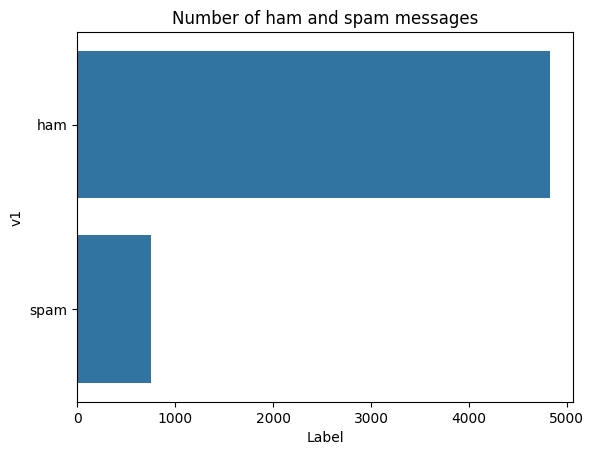

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

# # # # # # # # # 데이터 가져오기 및 전처리 # # # # # # # # #
df = pd.read_csv("./spam.csv", delimiter = ",", encoding = "latin-1")
df.head()

# 필요 없는 칼럼 삭제
df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1, inplace = True)
df.info()

sns.countplot(df.v1)
plt.xlabel("Label")
plt.title("Number of ham and spam messages")

# input, output 정의
X = df.v2
Y = df.v1
le = LabelEncoder() # 범주형 데이터로 변환하는 함수
Y = le.fit_transform(Y)   # Y의 데이터를 숫자로 변환  ham(0), ham(1)
Y = Y.reshape(-1, 1)

# 데이터 나누기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15)

# Tokenizer + padding
max_words = 1000
max_len = 150
tok = Tokenizer(num_words = max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences, maxlen = max_len)

# # # # # # # # # 모델 정의 및 훈련 # # # # # # # # #
# 모델 생성
def RNN():
  # 함수로 정의하는 모델의 경우, 변수로 정의해서 각 층을 넣는다. 이 때, 다음 레이어에
  # (이전 레이어 이름)을 붙여, 각 변수(층)가 전 층의 출력을 받도록 설계한다.
  # 이런 형식으로 API 등을 구성하므로, 잘 알아두자
  inputs = Input(name = "inputs", shape = [max_len])
  layer = Embedding(max_words, 50, input_length = max_len)(inputs)
  layer = LSTM(64)(layer)
  layer = Dense(256, name = "FC1")(layer)
  layer = Activation("relu")(layer)
  layer = Dropout(0.5)(layer)
  layer = Dense(1, name = "out_layer")(layer)
  layer = Activation("sigmoid")(layer)
  model = Model(inputs = inputs, outputs = layer)
  return model

# 모델 사용
model = RNN()
model.summary()
model.compile(loss = "binary_crossentropy", optimizer = RMSprop(), metrics = ["accuracy"])
model.fit(sequences_matrix, Y_train, batch_size = 128, epochs = 10,
          validation_split = 0.2,
          callbacks = [EarlyStopping(monitor = "val_loss", min_delta = 0.0001)])

# 모델 평가
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences, maxlen = max_len)
accr = model.evaluate(test_sequences_matrix, Y_test)